In [1]:
import pandas as pd

In [3]:
#df_occ = pd.read_csv('TORCH-Denton-9f30f07b-e694-4f79-83c3-54fafaa98727.csv', low_memory=False)
#df_occ = pd.read_csv('r_dale_thomas_texas_bels.csv', low_memory=False)
#df_occ = pd.read_csv('r-dale-thomas-all-seinet-texas-bels.csv', low_memory=False)
df_occ = pd.read_csv('ACU_485_DwC_A.csv', low_memory=False, sep='\t')

In [4]:
df_occ.shape

(5240, 109)

In [5]:
list(df_occ.columns)

['Unnamed: 0',
 'id',
 'institutionCode',
 'collectionCode',
 'ownerInstitutionCode',
 'collectionID',
 'basisOfRecord',
 'occurrenceID',
 'catalogNumber',
 'otherCatalogNumbers',
 'higherClassification',
 'kingdom',
 'phylum',
 'class',
 'order',
 'family',
 'scientificName',
 'taxonID',
 'scientificNameAuthorship',
 'genus',
 'subgenus',
 'specificEpithet',
 'verbatimTaxonRank',
 'infraspecificEpithet',
 'taxonRank',
 'identifiedBy',
 'dateIdentified',
 'identificationReferences',
 'identificationRemarks',
 'taxonRemarks',
 'identificationQualifier',
 'typeStatus',
 'recordedBy',
 'associatedCollectors',
 'recordNumber',
 'eventDate',
 'eventDate2',
 'year',
 'month',
 'day',
 'startDayOfYear',
 'endDayOfYear',
 'verbatimEventDate',
 'occurrenceRemarks',
 'habitat',
 'substrate',
 'verbatimAttributes',
 'fieldNumber',
 'eventID',
 'informationWithheld',
 'dataGeneralizations',
 'dynamicProperties',
 'associatedOccurrences',
 'associatedSequences',
 'associatedTaxa',
 'reproductiveCon

In [22]:
df_occ_good = df_occ[df_occ.bels_georeference_score >= 10]

In [23]:
df_occ_good.to_csv('df_occ_good.csv')

In [24]:
#bels_matchwithcoords
df_matches = df_occ[df_occ['bels_matchwithcoords'].duplicated(keep=False)]
#df_matches = df_denton[df_denton.bels_matchwithcoords



In [25]:
df_matches.shape

(4766, 115)

In [26]:
# find records lacking geo
#bels_decimallatitude
df_nogeo = df_matches[df_matches['bels_decimallatitude'].isna()]


In [27]:
df_nogeo.shape

(4540, 115)

In [22]:
df_nogeo.to_csv('df_nogeo.csv')

In [28]:
#dups = df.pivot_table(index = ['Course'], aggfunc ='size') 
dup_locs = df_nogeo.pivot_table(index = ['bels_matchwithcoords'], aggfunc ='size') 

In [30]:
print(dup_locs)

bels_matchwithcoords
ustexas                                                                                                       15
ustexasanderson                                                                                                2
ustexasandersonatdogwoodhillsbaptistchurchbesideus791.4milesnorthoftexas256andpalestinetx                      2
ustexasandersonbesideus79atus287intersectioninpalestine                                                       10
ustexasandersondogwoodhillsbaptistchurchbesideus791.4milesnorthoftexas256andpalestinetx                        2
                                                                                                              ..
ustexaswilliamsonareaaroundtexashighwaydeptgravelstoragesiteinprairiebesideus79eastoftaylor30.58-97.354706     7
ustexaszapatarightofwayofus83,9.6mileswestofygnacioalkalaiarea                                                 2
ustexaszapataroadbankandrightofwayofus83,9.6mileswestofygmaciotexas        

In [29]:
dup_locs.shape

(625,)

In [31]:
dup_locs.to_csv('dup_locs_r_dale_thomas.csv')

In [62]:
# from ChatGPT
#https://chat.openai.com/share/21c561bb-db43-47ee-980a-f88078b8c78b
# Identify duplicate values in a specific column
duplicates = df_matches['bels_matchwithcoords'].duplicated(keep=False)

# Count the number of duplicates for each value
duplicate_counts = duplicates.groupby(df_matches['bels_matchwithcoords']).sum()

# Add a new column to the DataFrame with the number of duplicates
df_matches['duplicate_count'] = df_matches['bels_matchwithcoords'].map(duplicate_counts)

/var/folders/1k/5g1w6wj10w5dyh9m0qbx_2w00000gn/T/ipykernel_50429/276279232.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['duplicate_count'] = df_matches['bels_matchwithcoords'].map(duplicate_counts)


In [85]:
#duplicate_counts.sort_index().cumsum().plot()
duplicate_counts.set_index('duplicate_count')
duplicate_counts.sort_index().plot()

AttributeError: 'Series' object has no attribute 'set_index'

In [66]:
df_matches[['duplicate_count']] = df_matches[['duplicate_count']].apply(pd.to_numeric)

/var/folders/1k/5g1w6wj10w5dyh9m0qbx_2w00000gn/T/ipykernel_50429/3606139242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches[['duplicate_count']] = df_matches[['duplicate_count']].apply(pd.to_numeric)


In [68]:
df_matches.shape

(6678, 116)

In [69]:
df_matches.set_index('duplicate_count').cumsum()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [70]:
df_matches.sort_index().cumsum().plot()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [49]:
df_matches.to_csv('df_matches_counts.csv')

In [55]:
df = pd.DataFrame({'cost_saving': [10, 10, 20, 40, 60, 60],
                   'id': ['a', 'b', 'c', 'd', 'e', 'f']})

In [56]:
df.set_index('id').cumsum()

,cost_saving
id,
a,10
b,20
c,40
d,80
e,140
f,200


<Axes: >

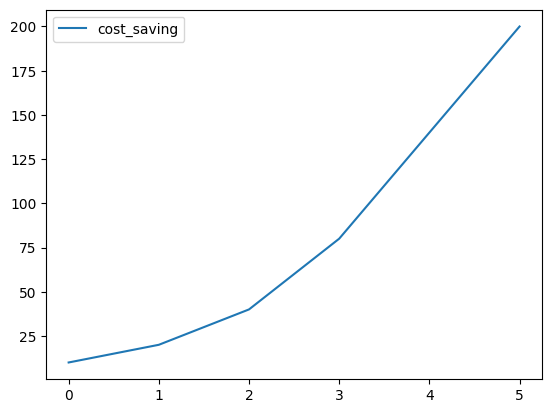

In [59]:
df.sort_index().cumsum().plot()

In [58]:
df.reset_index().plot.line(df.cost_saving.cumsum(), 'index', drawstyle='steps')

KeyError: "None of [Index([10, 20, 40, 80, 140, 200], dtype='int64')] are in the [columns]"